### load data

In [1]:
from copy import deepcopy
from sklearn.model_selection import train_test_split

from utils import get_dataset_from_OPENML, preprocess_df
from config import NOMINIAL_COLS, NUMERICAL_COLS, DATASET_ID

df_dict, input_dim_dict, output_dim_dict, nominial_cols_dict, numerical_cols_dict, nominial_cols_nclass_dict = {}, {}, {}, {}, {}, {}
X_processed_dict, y_dict, X_train_dict, X_test_dict, y_train_dict, y_test_dict = {}, {}, {}, {}, {}, {}
for dataset_name, dataset_id in DATASET_ID.items():
    df = get_dataset_from_OPENML(dataset_name=dataset_name)
    output_dim = len(df[df.columns[-1]].unique())
    # split data
    nominial_cols, numerical_cols = NOMINIAL_COLS[dataset_name], NUMERICAL_COLS[dataset_name]
    nominial_cols_nclass = []
    for col in nominial_cols:
        nominial_cols_nclass.append(len(df[col].unique()))
    X_processed, y = preprocess_df(df=df, numerical_cols=numerical_cols, nominial_cols=nominial_cols)
    # split dataset for original training
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
    # split dataset for retraining from scratch
    RT_X_processed = deepcopy(X_processed[:, 1:])
    RT_X_train, RT_X_test, _, _ = train_test_split(RT_X_processed, y, test_size=0.2, random_state=42)
    input_dim = X_train.shape[1]
    
    df_dict[dataset_name] = df
    input_dim_dict[dataset_name] = input_dim 
    output_dim_dict[dataset_name] = output_dim
    nominial_cols_dict[dataset_name] = nominial_cols
    numerical_cols_dict[dataset_name] = numerical_cols
    nominial_cols_nclass_dict[dataset_name] = nominial_cols_nclass
    X_processed_dict[dataset_name] = X_processed
    y_dict[dataset_name] = y 
    X_train_dict[dataset_name] = X_train
    X_test_dict[dataset_name] = X_test
    y_train_dict[dataset_name] = y_train
    y_test_dict[dataset_name] = y_test

### BANK_MARKETING

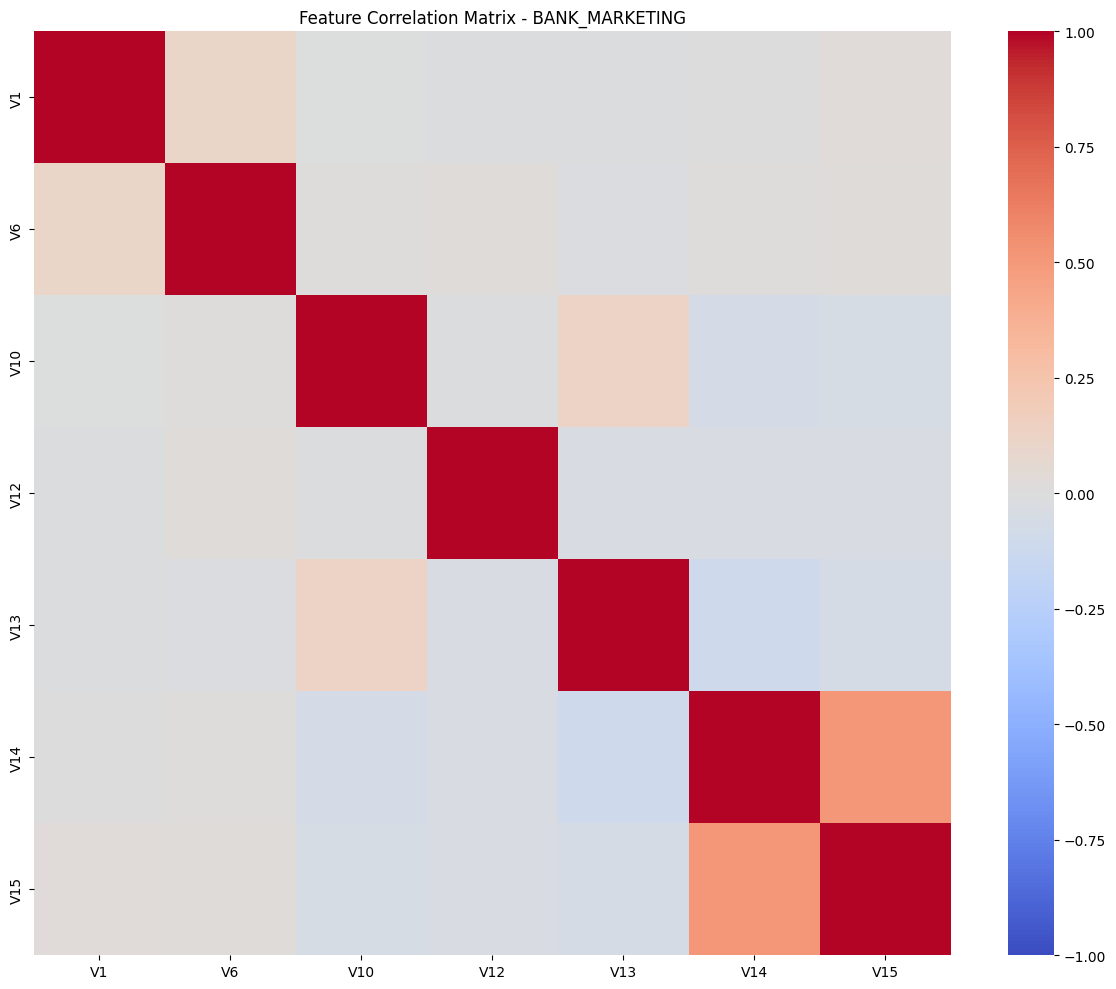


Highly correlated features in BANK_MARKETING (threshold = 0.8):
No feature pairs exceeded the correlation threshold.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset_name = 'BANK_MARKETING'
df = df_dict['BANK_MARKETING']
df_cp = deepcopy(df)
class_col = df_cp.columns[-1]
df_cp.drop(labels=[class_col], axis=1, inplace=True)

# Calculate correlation matrix
corr_matrix = df_cp.corr()

# Set threshold for high correlation
threshold = 0.8

# Find highly correlated pairs
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        feature_i = corr_matrix.columns[i]
        feature_j = corr_matrix.columns[j]
        correlation = abs(corr_matrix.iloc[i, j])
        
        if correlation > threshold:
            high_corr_pairs.append((feature_i, feature_j, correlation))

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Feature Correlation Matrix - {dataset_name}')
plt.tight_layout()
plt.show()

# Print highly correlated features
print(f"\nHighly correlated features in {dataset_name} (threshold = {threshold}):")
if high_corr_pairs:
    sorted_pairs = sorted(high_corr_pairs, key=lambda x: x[2], reverse=True)
    for feature_i, feature_j, corr in sorted_pairs:
        print(f"- {feature_i} and {feature_j}: {corr:.3f}")
else:
    print("No feature pairs exceeded the correlation threshold.")
    
# Find features most frequently in high-correlation pairs
if high_corr_pairs:
    feature_counts = {}
    for feat_i, feat_j, _ in high_corr_pairs:
        feature_counts[feat_i] = feature_counts.get(feat_i, 0) + 1
        feature_counts[feat_j] = feature_counts.get(feat_j, 0) + 1
    
    print("\nFeatures most frequently involved in high correlations:")
    for feature, count in sorted(feature_counts.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(f"- {feature}: correlated with {count} other features")

### CALI

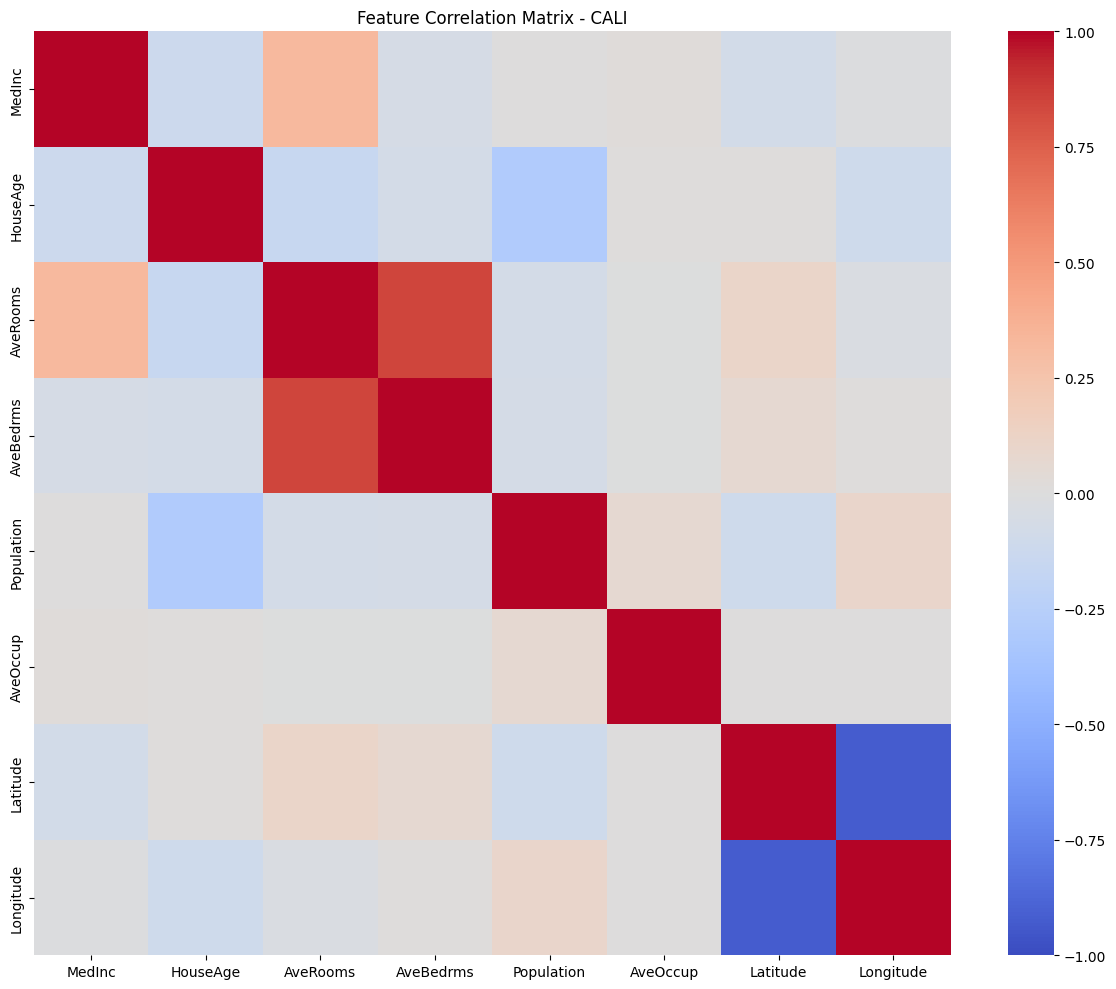


Highly correlated features in CALI (threshold = 0.8):
- Latitude and Longitude: 0.925
- AveRooms and AveBedrms: 0.848

Features most frequently involved in high correlations:
- AveRooms: correlated with 1 other features
- AveBedrms: correlated with 1 other features
- Latitude: correlated with 1 other features
- Longitude: correlated with 1 other features


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset_name = 'CALI'
df = df_dict['CALI']
df_cp = deepcopy(df)
class_col = df_cp.columns[-1]
df_cp.drop(labels=[class_col], axis=1, inplace=True)

# Calculate correlation matrix
corr_matrix = df_cp.corr()

# Set threshold for high correlation
threshold = 0.8

# Find highly correlated pairs
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        feature_i = corr_matrix.columns[i]
        feature_j = corr_matrix.columns[j]
        correlation = abs(corr_matrix.iloc[i, j])
        
        if correlation > threshold:
            high_corr_pairs.append((feature_i, feature_j, correlation))

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Feature Correlation Matrix - {dataset_name}')
plt.tight_layout()
plt.show()

# Print highly correlated features
print(f"\nHighly correlated features in {dataset_name} (threshold = {threshold}):")
if high_corr_pairs:
    sorted_pairs = sorted(high_corr_pairs, key=lambda x: x[2], reverse=True)
    for feature_i, feature_j, corr in sorted_pairs:
        print(f"- {feature_i} and {feature_j}: {corr:.3f}")
else:
    print("No feature pairs exceeded the correlation threshold.")
    
# Find features most frequently in high-correlation pairs
if high_corr_pairs:
    feature_counts = {}
    for feat_i, feat_j, _ in high_corr_pairs:
        feature_counts[feat_i] = feature_counts.get(feat_i, 0) + 1
        feature_counts[feat_j] = feature_counts.get(feat_j, 0) + 1
    
    print("\nFeatures most frequently involved in high correlations:")
    for feature, count in sorted(feature_counts.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(f"- {feature}: correlated with {count} other features")

### CREDIT

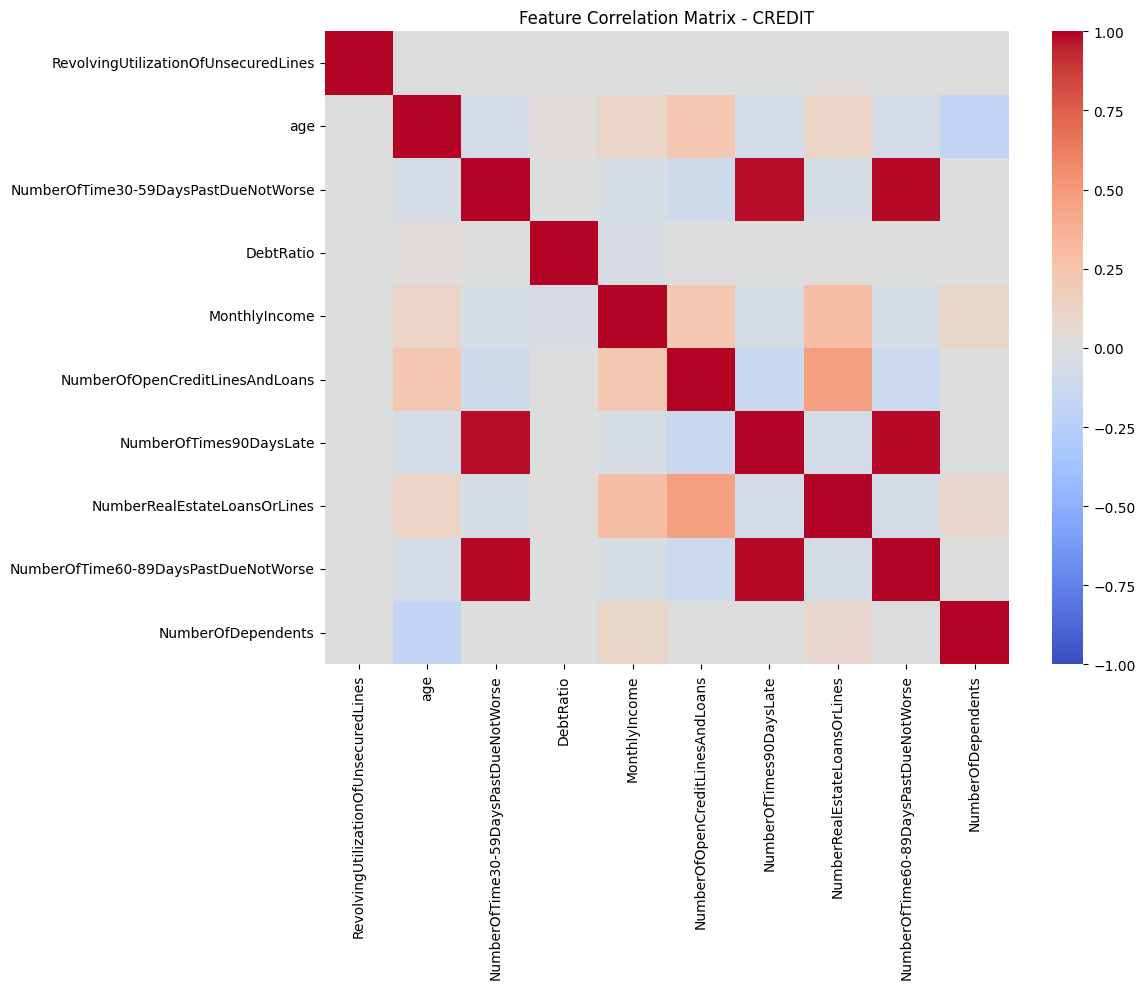


Highly correlated features in CREDIT (threshold = 0.8):
- NumberOfTimes90DaysLate and NumberOfTime60-89DaysPastDueNotWorse: 0.991
- NumberOfTime30-59DaysPastDueNotWorse and NumberOfTime60-89DaysPastDueNotWorse: 0.988
- NumberOfTime30-59DaysPastDueNotWorse and NumberOfTimes90DaysLate: 0.983

Features most frequently involved in high correlations:
- NumberOfTime30-59DaysPastDueNotWorse: correlated with 2 other features
- NumberOfTimes90DaysLate: correlated with 2 other features
- NumberOfTime60-89DaysPastDueNotWorse: correlated with 2 other features


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset_name = 'CREDIT'
df = df_dict['CREDIT']
df_cp = deepcopy(df)
class_col = df_cp.columns[-1]
df_cp.drop(labels=[class_col], axis=1, inplace=True)

# Calculate correlation matrix
corr_matrix = df_cp.corr()

# Set threshold for high correlation
threshold = 0.8

# Find highly correlated pairs
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        feature_i = corr_matrix.columns[i]
        feature_j = corr_matrix.columns[j]
        correlation = abs(corr_matrix.iloc[i, j])
        
        if correlation > threshold:
            high_corr_pairs.append((feature_i, feature_j, correlation))

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Feature Correlation Matrix - {dataset_name}')
plt.tight_layout()
plt.show()

# Print highly correlated features
print(f"\nHighly correlated features in {dataset_name} (threshold = {threshold}):")
if high_corr_pairs:
    sorted_pairs = sorted(high_corr_pairs, key=lambda x: x[2], reverse=True)
    for feature_i, feature_j, corr in sorted_pairs:
        print(f"- {feature_i} and {feature_j}: {corr:.3f}")
else:
    print("No feature pairs exceeded the correlation threshold.")
    
# Find features most frequently in high-correlation pairs
if high_corr_pairs:
    feature_counts = {}
    for feat_i, feat_j, _ in high_corr_pairs:
        feature_counts[feat_i] = feature_counts.get(feat_i, 0) + 1
        feature_counts[feat_j] = feature_counts.get(feat_j, 0) + 1
    
    print("\nFeatures most frequently involved in high correlations:")
    for feature, count in sorted(feature_counts.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(f"- {feature}: correlated with {count} other features")

### ELECTRICITY

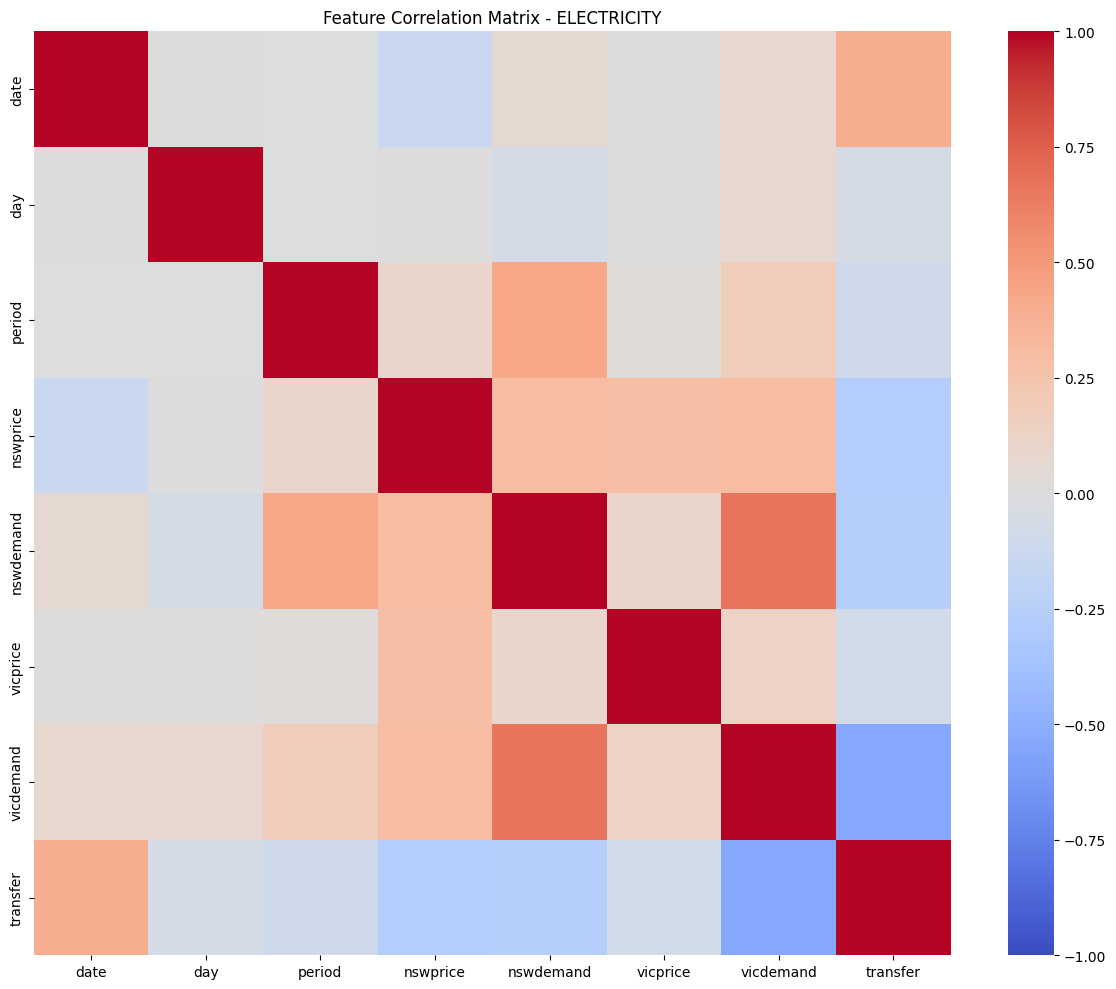


Highly correlated features in ELECTRICITY (threshold = 0.8):
No feature pairs exceeded the correlation threshold.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset_name = 'ELECTRICITY'
df = df_dict['ELECTRICITY']
df_cp = deepcopy(df)
class_col = df_cp.columns[-1]
df_cp.drop(labels=[class_col], axis=1, inplace=True)

# Calculate correlation matrix
corr_matrix = df_cp.corr()

# Set threshold for high correlation
threshold = 0.8

# Find highly correlated pairs
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        feature_i = corr_matrix.columns[i]
        feature_j = corr_matrix.columns[j]
        correlation = abs(corr_matrix.iloc[i, j])
        
        if correlation > threshold:
            high_corr_pairs.append((feature_i, feature_j, correlation))

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Feature Correlation Matrix - {dataset_name}')
plt.tight_layout()
plt.show()

# Print highly correlated features
print(f"\nHighly correlated features in {dataset_name} (threshold = {threshold}):")
if high_corr_pairs:
    sorted_pairs = sorted(high_corr_pairs, key=lambda x: x[2], reverse=True)
    for feature_i, feature_j, corr in sorted_pairs:
        print(f"- {feature_i} and {feature_j}: {corr:.3f}")
else:
    print("No feature pairs exceeded the correlation threshold.")
    
# Find features most frequently in high-correlation pairs
if high_corr_pairs:
    feature_counts = {}
    for feat_i, feat_j, _ in high_corr_pairs:
        feature_counts[feat_i] = feature_counts.get(feat_i, 0) + 1
        feature_counts[feat_j] = feature_counts.get(feat_j, 0) + 1
    
    print("\nFeatures most frequently involved in high correlations:")
    for feature, count in sorted(feature_counts.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(f"- {feature}: correlated with {count} other features")

### MAGIC_TELE

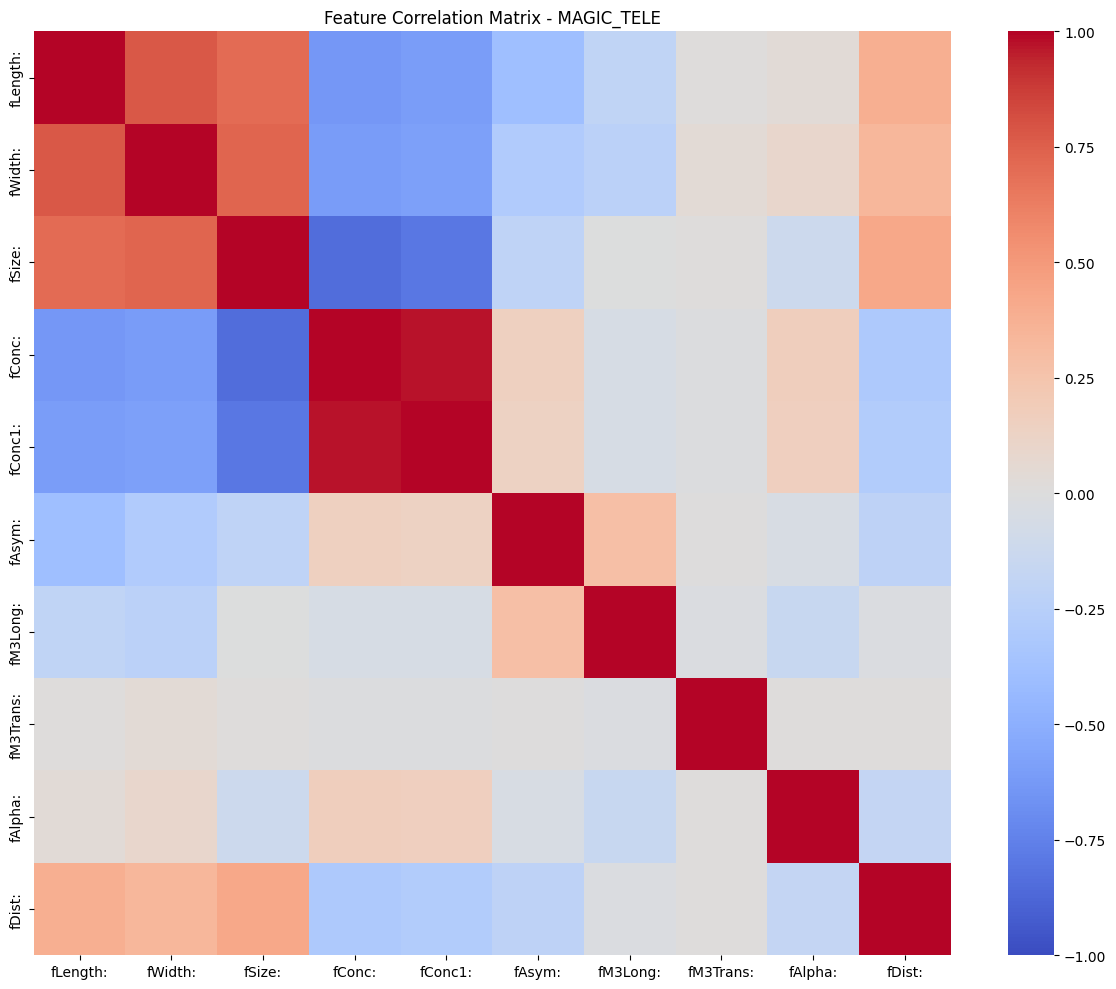


Highly correlated features in MAGIC_TELE (threshold = 0.8):
- fConc: and fConc1:: 0.975
- fSize: and fConc:: 0.847
- fSize: and fConc1:: 0.804

Features most frequently involved in high correlations:
- fSize:: correlated with 2 other features
- fConc:: correlated with 2 other features
- fConc1:: correlated with 2 other features


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset_name = 'MAGIC_TELE'
df = df_dict['MAGIC_TELE']
df_cp = deepcopy(df)
class_col = df_cp.columns[-1]
df_cp.drop(labels=[class_col], axis=1, inplace=True)

# Calculate correlation matrix
corr_matrix = df_cp.corr()

# Set threshold for high correlation
threshold = 0.8

# Find highly correlated pairs
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        feature_i = corr_matrix.columns[i]
        feature_j = corr_matrix.columns[j]
        correlation = abs(corr_matrix.iloc[i, j])
        
        if correlation > threshold:
            high_corr_pairs.append((feature_i, feature_j, correlation))

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Feature Correlation Matrix - {dataset_name}')
plt.tight_layout()
plt.show()

# Print highly correlated features
print(f"\nHighly correlated features in {dataset_name} (threshold = {threshold}):")
if high_corr_pairs:
    sorted_pairs = sorted(high_corr_pairs, key=lambda x: x[2], reverse=True)
    for feature_i, feature_j, corr in sorted_pairs:
        print(f"- {feature_i} and {feature_j}: {corr:.3f}")
else:
    print("No feature pairs exceeded the correlation threshold.")
    
# Find features most frequently in high-correlation pairs
if high_corr_pairs:
    feature_counts = {}
    for feat_i, feat_j, _ in high_corr_pairs:
        feature_counts[feat_i] = feature_counts.get(feat_i, 0) + 1
        feature_counts[feat_j] = feature_counts.get(feat_j, 0) + 1
    
    print("\nFeatures most frequently involved in high correlations:")
    for feature, count in sorted(feature_counts.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(f"- {feature}: correlated with {count} other features")

### PHONEME

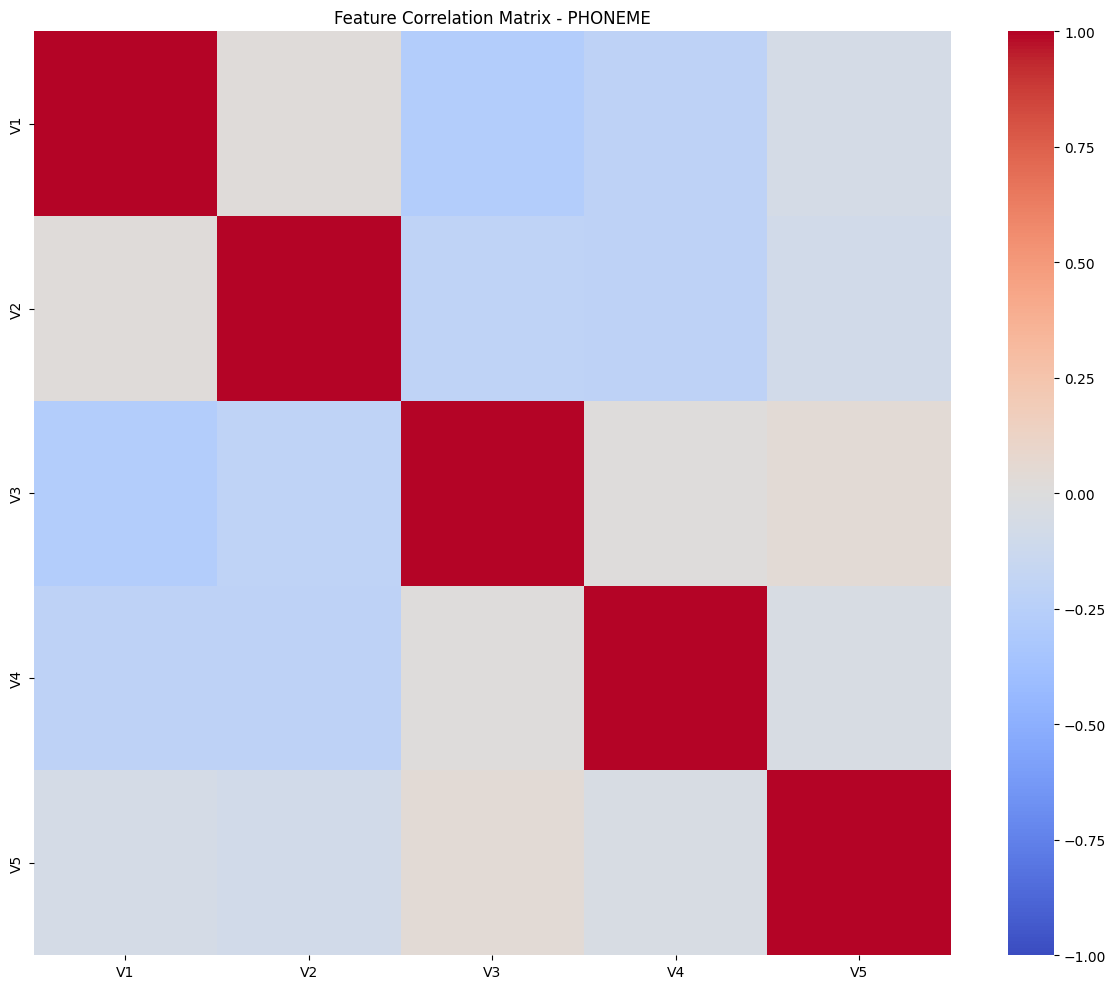


Highly correlated features in PHONEME (threshold = 0.8):
No feature pairs exceeded the correlation threshold.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset_name = 'PHONEME'
df = df_dict['PHONEME']
df_cp = deepcopy(df)
class_col = df_cp.columns[-1]
df_cp.drop(labels=[class_col], axis=1, inplace=True)

# Calculate correlation matrix
corr_matrix = df_cp.corr()

# Set threshold for high correlation
threshold = 0.8

# Find highly correlated pairs
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        feature_i = corr_matrix.columns[i]
        feature_j = corr_matrix.columns[j]
        correlation = abs(corr_matrix.iloc[i, j])
        
        if correlation > threshold:
            high_corr_pairs.append((feature_i, feature_j, correlation))

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Feature Correlation Matrix - {dataset_name}')
plt.tight_layout()
plt.show()

# Print highly correlated features
print(f"\nHighly correlated features in {dataset_name} (threshold = {threshold}):")
if high_corr_pairs:
    sorted_pairs = sorted(high_corr_pairs, key=lambda x: x[2], reverse=True)
    for feature_i, feature_j, corr in sorted_pairs:
        print(f"- {feature_i} and {feature_j}: {corr:.3f}")
else:
    print("No feature pairs exceeded the correlation threshold.")
    
# Find features most frequently in high-correlation pairs
if high_corr_pairs:
    feature_counts = {}
    for feat_i, feat_j, _ in high_corr_pairs:
        feature_counts[feat_i] = feature_counts.get(feat_i, 0) + 1
        feature_counts[feat_j] = feature_counts.get(feat_j, 0) + 1
    
    print("\nFeatures most frequently involved in high correlations:")
    for feature, count in sorted(feature_counts.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(f"- {feature}: correlated with {count} other features")

### RL

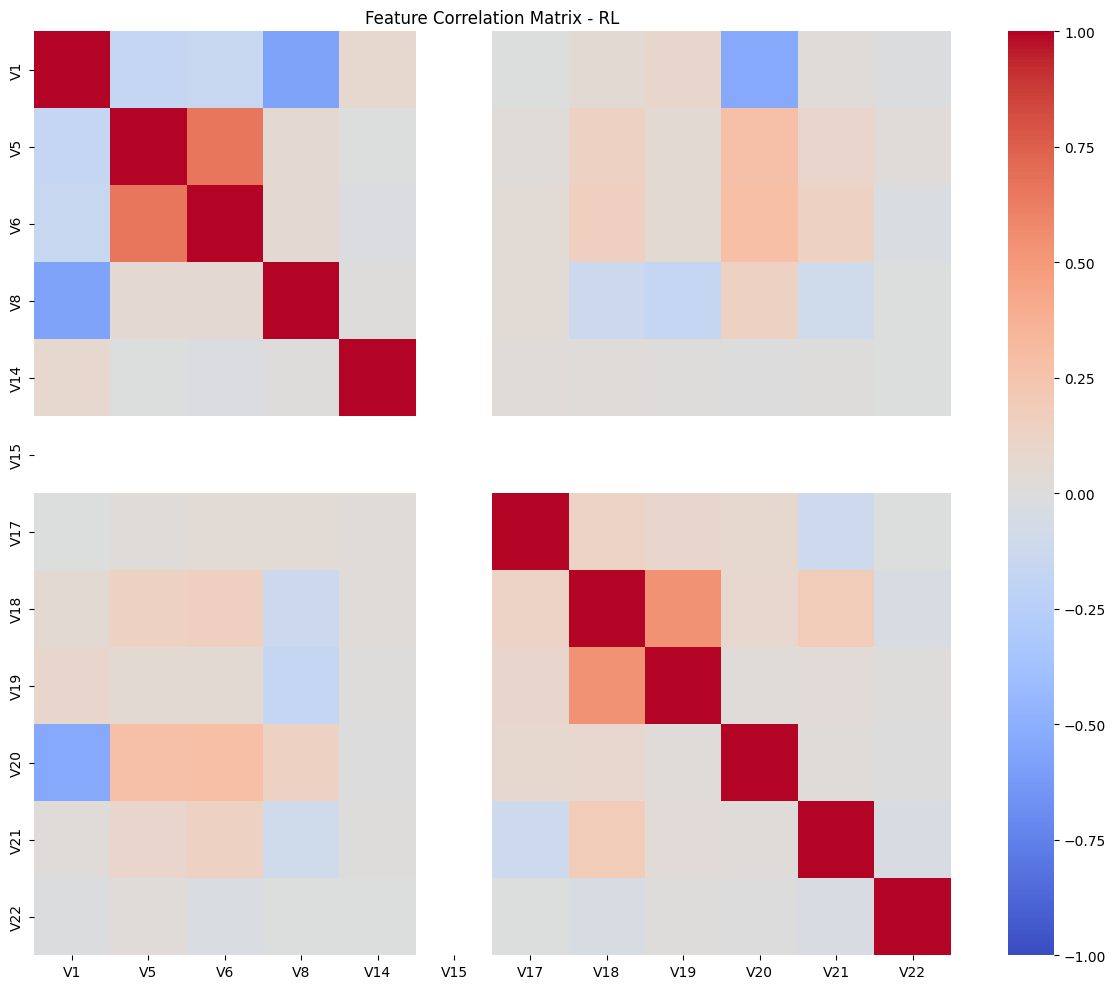


Highly correlated features in RL (threshold = 0.8):
No feature pairs exceeded the correlation threshold.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset_name = 'RL'
df = df_dict['RL']
df_cp = deepcopy(df)
class_col = df_cp.columns[-1]
df_cp.drop(labels=[class_col], axis=1, inplace=True)

# Calculate correlation matrix
corr_matrix = df_cp.corr()

# Set threshold for high correlation
threshold = 0.8

# Find highly correlated pairs
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        feature_i = corr_matrix.columns[i]
        feature_j = corr_matrix.columns[j]
        correlation = abs(corr_matrix.iloc[i, j])
        
        if correlation > threshold:
            high_corr_pairs.append((feature_i, feature_j, correlation))

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Feature Correlation Matrix - {dataset_name}')
plt.tight_layout()
plt.show()

# Print highly correlated features
print(f"\nHighly correlated features in {dataset_name} (threshold = {threshold}):")
if high_corr_pairs:
    sorted_pairs = sorted(high_corr_pairs, key=lambda x: x[2], reverse=True)
    for feature_i, feature_j, corr in sorted_pairs:
        print(f"- {feature_i} and {feature_j}: {corr:.3f}")
else:
    print("No feature pairs exceeded the correlation threshold.")
    
# Find features most frequently in high-correlation pairs
if high_corr_pairs:
    feature_counts = {}
    for feat_i, feat_j, _ in high_corr_pairs:
        feature_counts[feat_i] = feature_counts.get(feat_i, 0) + 1
        feature_counts[feat_j] = feature_counts.get(feat_j, 0) + 1
    
    print("\nFeatures most frequently involved in high correlations:")
    for feature, count in sorted(feature_counts.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(f"- {feature}: correlated with {count} other features")

### WINE

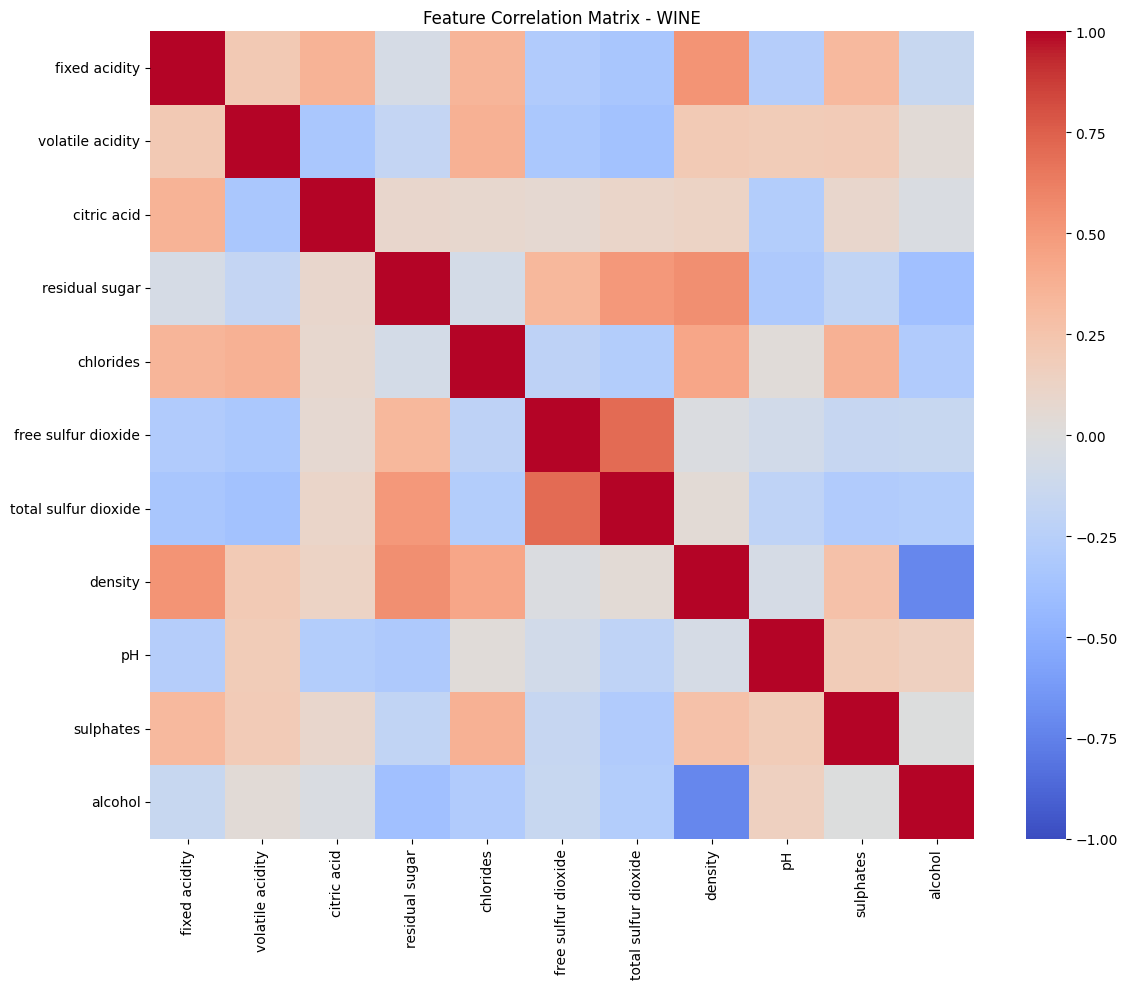


Highly correlated features in WINE (threshold = 0.8):
No feature pairs exceeded the correlation threshold.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset_name = 'WINE'
df = df_dict['WINE']
df_cp = deepcopy(df)
class_col = df_cp.columns[-1]
df_cp.drop(labels=[class_col], axis=1, inplace=True)

# Calculate correlation matrix
corr_matrix = df_cp.corr()

# Set threshold for high correlation
threshold = 0.8

# Find highly correlated pairs
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        feature_i = corr_matrix.columns[i]
        feature_j = corr_matrix.columns[j]
        correlation = abs(corr_matrix.iloc[i, j])
        
        if correlation > threshold:
            high_corr_pairs.append((feature_i, feature_j, correlation))

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Feature Correlation Matrix - {dataset_name}')
plt.tight_layout()
plt.show()

# Print highly correlated features
print(f"\nHighly correlated features in {dataset_name} (threshold = {threshold}):")
if high_corr_pairs:
    sorted_pairs = sorted(high_corr_pairs, key=lambda x: x[2], reverse=True)
    for feature_i, feature_j, corr in sorted_pairs:
        print(f"- {feature_i} and {feature_j}: {corr:.3f}")
else:
    print("No feature pairs exceeded the correlation threshold.")
    
# Find features most frequently in high-correlation pairs
if high_corr_pairs:
    feature_counts = {}
    for feat_i, feat_j, _ in high_corr_pairs:
        feature_counts[feat_i] = feature_counts.get(feat_i, 0) + 1
        feature_counts[feat_j] = feature_counts.get(feat_j, 0) + 1
    
    print("\nFeatures most frequently involved in high correlations:")
    for feature, count in sorted(feature_counts.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(f"- {feature}: correlated with {count} other features")